<a href="https://colab.research.google.com/github/jiyun-kong/ML-DL_Basis/blob/main/ch6_UnsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# chapter 6. 비지도 학습 - 비슷한 과일끼리 모으자!

## 06-1 군집 알고리즘

### 타깃을 모르는 비지도 학습
- 군집 : 비슷한 샘플끼리 하나의 그룹으로 모으는 대표적인 비지도 학습 작업
- 클러스터 : 군집 알고리즘으로 모은 샘플 그룹

In [4]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-07-01 04:20:37--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-07-01 04:20:38--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-07-01 04:20:38--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [5]:
import numpy as np
import matplotlib.pyplot as plt
fruits = np.load('fruits_300.npy')
print(fruits.shape) 
# 300 : 샘플의 개수, 100 : 이미지 높이, 100 : 이미지 너비
# 이미지 크기가 100 * 100인 이미지가 총 300개 저장

(300, 100, 100)


In [6]:
fruits[0, 0, :]
# 첫번째 행에 있는 픽셀 100개에 들어 있는 값

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   2,   2,   2,   2,   2,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   3,   2,   1,   2,   1,   1,
         1,   1,   2,   1,   3,   2,   1,   3,   1,   4,   1,   2,   5,
         5,   5,  19, 148, 192, 117,  28,   1,   1,   2,   1,   4,   1,
         1,   3,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

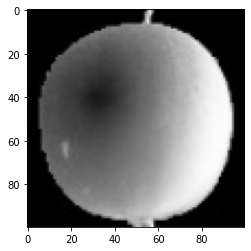

In [7]:
plt.imshow(fruits[0], cmap='gray')
plt.show()
# 0에 가까울수록 어둡고, 255에 가까울수록 밝다 : 배열에서 148, 192, 117,  28 부분

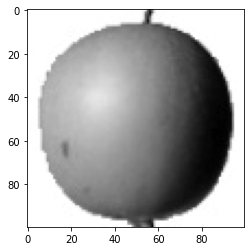

In [8]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()
# 0에 가까울수록 밝고, 255에 가까울수록 어둡다

- subplots() : 여러 개의 그래프를 하나의 그림으로 나타낼 수 있다.
- subplots(1, 2) : 하나의 행과 두개의 열을 지정하여 하나의 그림 안에 표현한다.
- axs : 서브 그래프를 담고 있는 배열

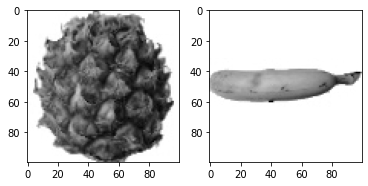

In [9]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100], cmap='gray_r') # 파인애플
axs[1].imshow(fruits[200], cmap='gray_r') # 바나나
plt.show()

### 픽셀값 분석하기

In [10]:
# 100 * 100 배열을 10000 * 1 배열로 펼치기 → 이미지로 출력하는 것은 어려워지지만, 배열을 계산할 때 편리하다.
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)
# 첫번째 차원을 -1로 지정하면 자동으로 남은 차원을 할당한다.

In [11]:
print(apple.shape)
print(pineapple.shape)
print(banana.shape)

(100, 10000)
(100, 10000)
(100, 10000)


In [12]:
# 사과, 파인애플, 바나나 배열에 들어 있는 샘플의 픽셀 평균값을 계산한다.
print(apple.mean(axis=1))
print(apple.mean(axis=1).shape)

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]
(100,)


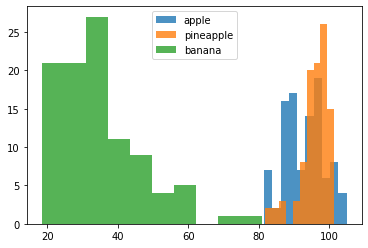

In [13]:
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()
# alpha() : 투명도 조절
# legend() : 범례

- 바나나는 사진에서 차지하는 영역이 작기 때문에 픽셀값이 전반적으로 작다.
- 사과와 파인애플은 구분이 어렵다.
- 샘플의 평균값으로는 세 과일을 구분할 수 없다.
  - 전체 샘플에 대해 각 픽셀의 평균을 계산한다.
  - 세 과일의 모양이 다르므로 픽셀값이 높은 위치가 다르다.

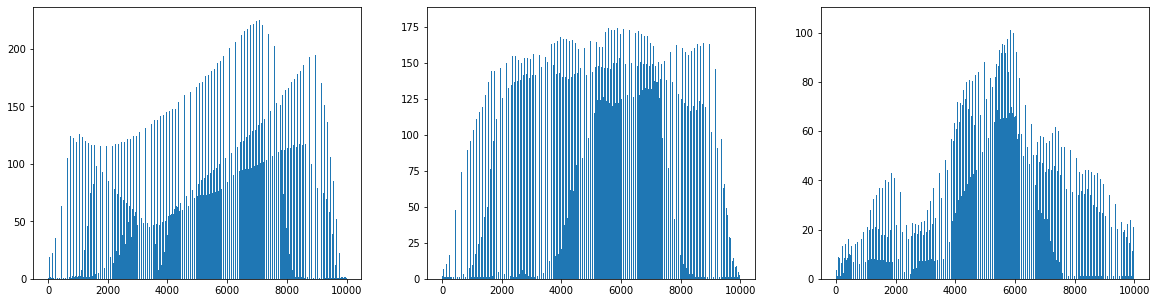

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()
# 사과, 파인애플, 바나나

- 과일마다 값이 높은 구간이 다르다.
  - 사과 : 사진 아래쪽으로 갈수록 값이 높아진다.
  - 파인애플 : 비교적 고르게 높다.
  - 바나나 : 중앙의 값이 높다.

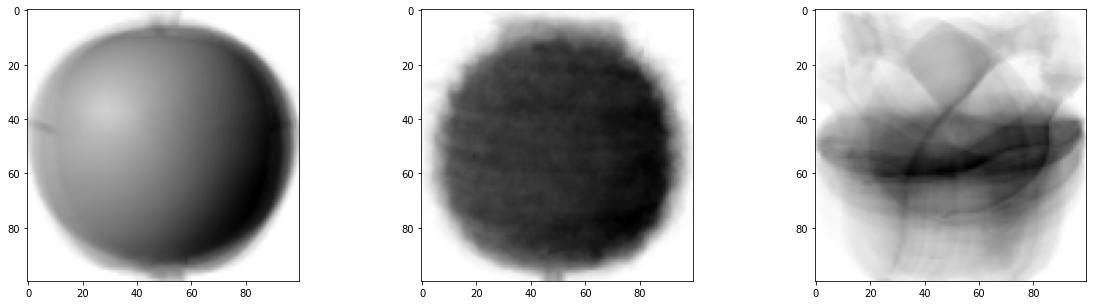

In [15]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

### 평균값과 가까운 사진 고르기
- 절대값 오차를 사용해서 그 값이 가장 작은 것이 평균값과 가까운 사진이다.

In [16]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))
print(abs_mean.shape)

(300,)


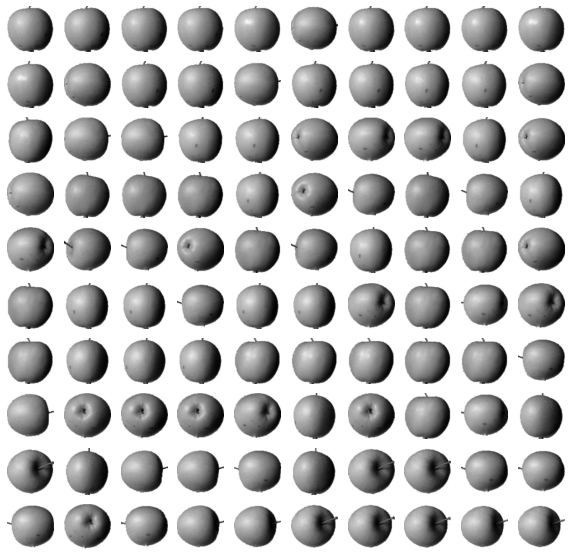

In [17]:
apple_index = np.argsort(abs_mean)[:100]  # 작은것부터 큰것까지 순서대로 나열한 배열의 인덱스를 반환한다.
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
    axs[i, j].axis('off')
plt.show()

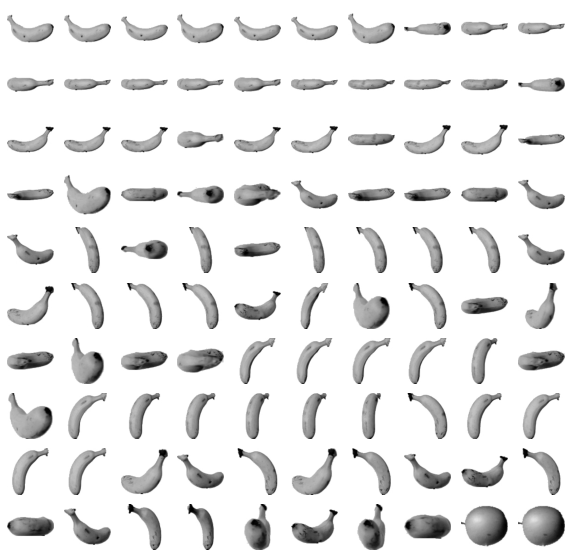

In [18]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))

banana_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap='gray_r')
    axs[i, j].axis('off')
plt.show()

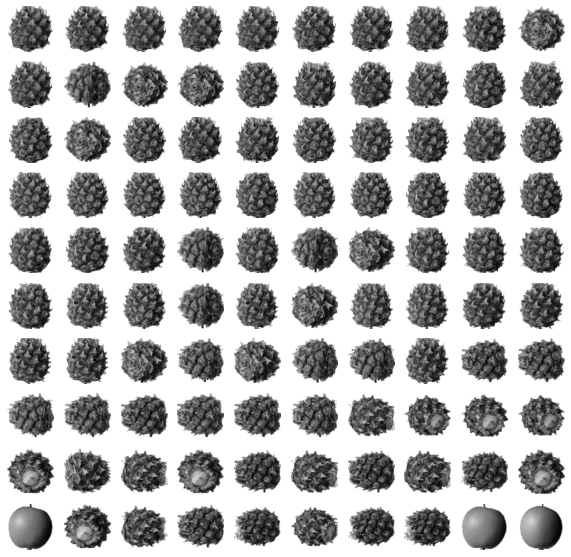

In [19]:
abs_diff = np.abs(fruits - pineapple_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))

pineapple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[pineapple_index[i*10 + j]], cmap='gray_r')
    axs[i, j].axis('off')
plt.show()

## 06-2 k-평균
- k-평균 군집 알고리즘이 평균값을 자동으로 찾아준다.
- 이 평균값이 클러스터의 중심에 위치하기 때문에 클러스터 중심 / 센트로이드라고 부른다.<br />
1. 무작위로 k개의 클러스터 중심을 정한다.
2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정한다.
3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경한다.
4. 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복한다.
- 처음에는 랜덤하게 클러스터 중심을 선택하고 점차 가까운 샘플의 중심으로 이동하는 간단한 알고리즘이다.

### KMeans 클래스

In [20]:
!wget https://bit.ly.fruits_300_data -O fruits_300.npy

--2022-07-01 04:22:24--  https://bit.ly.fruits_300_data/
Resolving bit.ly.fruits_300_data (bit.ly.fruits_300_data)... failed: Name or service not known.
wget: unable to resolve host address ‘bit.ly.fruits_300_data’


In [21]:
import numpy as np
fruits_2d = fruits.reshape(-1, 100*100)

In [22]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [23]:
print(km.labels_)
# 배열의 길이는 샘플의 개수와 같다. cluster가 3개이므로, 0, 1, 2 중 하나의 값을 갖는다.
print(np.unique(km.labels_, return_counts=True))

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


In [27]:
# 첫번째 클러스터가 111개의 샘플을 모았고, 두번째 클러스터가 98개의 샘플을 모았고, 세번째 클러스터가 91개의 샘플을 모았다.
# 각 클러스터가 어떤 이미지를 나타냈는지 그림으로 나타내기
def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i, j].axis('off')
  plt.show()

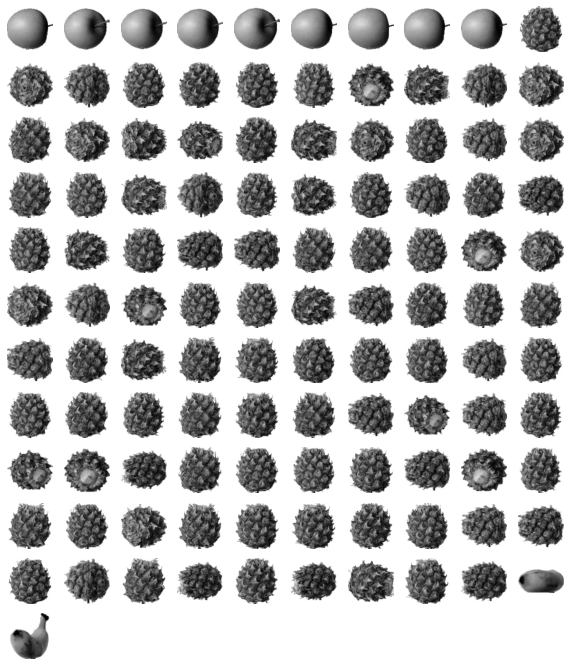

In [28]:
draw_fruits(fruits[km.labels_ == 0])

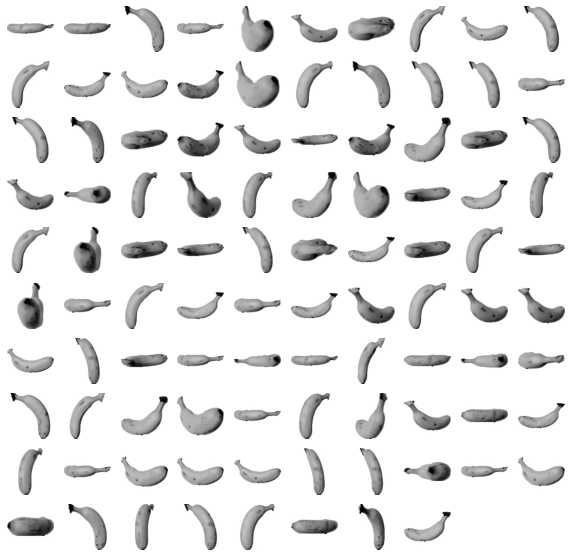

In [29]:
draw_fruits(fruits[km.labels_ == 1])

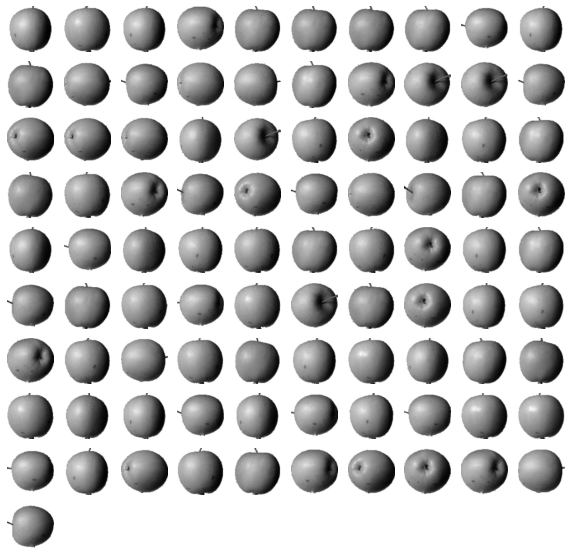

In [30]:
draw_fruits(fruits[km.labels_ == 2])

### 클러스터 중심
- k-평균 알고리즘이 이 샘플들을 완벽하게 구별해내지는 못했지만, 훈련 데이터에 타깃 레이블을 전현 제공하지 않았음에도 스스로 비슷한 샘플들을 잘 모았다.
- KMeans 클래스가 최종적으로 찾은 클러스터 중심은 cluster_centers_ 속성에 저장되어 있음
- KMeans 클래스는 훈련 데이터 샘플에서 클러스터 중심까지의 거리로 변환해주는 transform() 메서드를 가지고 있음

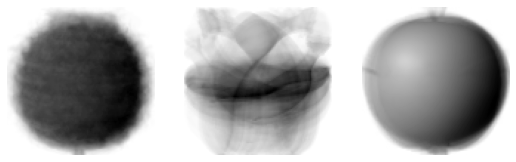

In [31]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [32]:
print(km.transform(fruits_2d[100:101]))

[[3393.8136117  8837.37750892 5267.70439881]]


In [33]:
# 가장 가까운 클러스터 중심을 예측 클래스로 출력하는 predict() 메서드를 제공한다.
print(km.predict(fruits_2d[100:101]))

[0]


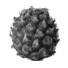

In [34]:
draw_fruits(fruits[100:101])

In [35]:
# 반복적으로 클러스터 중심을 옮기면서 최적의 클러스터를 찾는다. 알고리즘이 반복한 횟수는 KMeans 클래스의 n_iter_ 속성에 저장된다.
print(km.n_iter_)

4


### 최적의 k 찾기
- k-평균 알고리즘의 단점 중 하나가 클러스터의 개수를 사전에 지정해야 한다는 것이다.
- 이너셔 (inertia) : 클러스터 중심심과 샘플 사이의 거리의 제곱 합
- 클러스터 개수 ↑ 이너셔 ↓
- 엘보우 (elbow) : 적절한 클러스터 개수를 찾기 위한 대표적인 방법
  - 클러스터 개수를 늘려가면서 이너셔의 변화를 관찰하여 최적의 클러스터 개수를 찾는 방법이다.


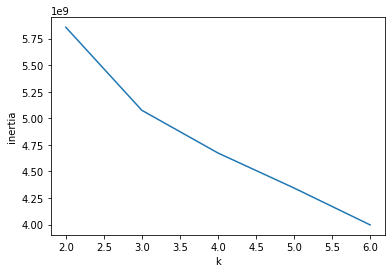

In [36]:
inertia = []
for k in range(2, 7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

## 06-3 주성분 분석
### 차원과 차원 축소
- 차원 == 특성
  - 생선의 특성 : 높이, 길이, 대각선, 두께 → 4개의 차원
  - 과일의 특성 : 픽셀 값 → 10,000개의 차원

- 차원 축소 : 가장 잘 나타내는 특성만을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킨다. 줄어든 차원에서 원본 차원으로 복원해도 손실이 적어야 한다.
- 고차원의 데이터는 계산과 시각화가 어려워 분석하기가 쉽지 않다.
  - 주성분 분석 (PCA)


### 주성분 분석
- 데이터에 있는 분산이 큰 방향을 찾는 것
  - 분산이 크다 : 데이터가 널리 퍼져있다.
  - 분산이 큰 방향 : 데이터를 잘 표현하는 어떤 벡터
  - http://matrix.skku.ac.kr/math4ai-intro/W12/ 참고
- 주성분 : 분산을 가장 크게 만드는 벡터
- 샘플 데이터를 주성분 벡터에 정사영 내려서 데이터를 만든다.
- 주성분은 원본 차원과 같고, 정사영 내려서 얻은 데이터는 차원이 줄어든다.
1. 주성분 찾기
2. 이 벡터에 수직이고 분산이 가장 큰 방향을 찾는다. (두번째 주성분)


### PCA 클래스

In [39]:
!wget https://bit.ly.fruits_300_data -O fruits_300.npy
import numpy as np
fruits_2d = fruits.reshape(-1, 100*100)

--2022-07-01 06:16:22--  https://bit.ly.fruits_300_data/
Resolving bit.ly.fruits_300_data (bit.ly.fruits_300_data)... failed: Name or service not known.
wget: unable to resolve host address ‘bit.ly.fruits_300_data’


In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)  # n_components : 주성분의 개수
pca.fit(fruits_2d)

PCA(n_components=50)

In [42]:
print(pca.components_.shape)

(50, 10000)


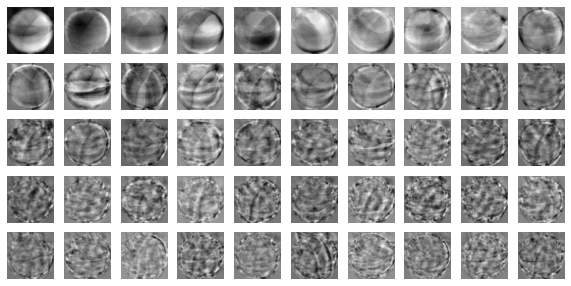

In [43]:
draw_fruits(pca.components_.reshape(-1, 100, 100))
# 특성의 개수 10000개에서 50개로 줄이기 가능

In [44]:
print(fruits_2d.shape)

(300, 10000)


In [45]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


- fruits_2d는 (300, 10000) 크기의 배열이다.
  - 10,000개의 픽셀을 가진 300개의 이미지이다.
- 50개의 주성분을 찾은 PCA 모델을 사용해 (300, 50) 크기의 배열로 변환했다.
  - 데이터 차원을 1/200으로 줄였다.

### 원본 데이터 재구성
- 10000개의 특성을 50개로 줄였는데, 이로 인한 어느 정도의 손실이 발생할 수밖에 없는 것은 사실이다.
- 하지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성할 수 있다.
  - inverse_transform()

In [47]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


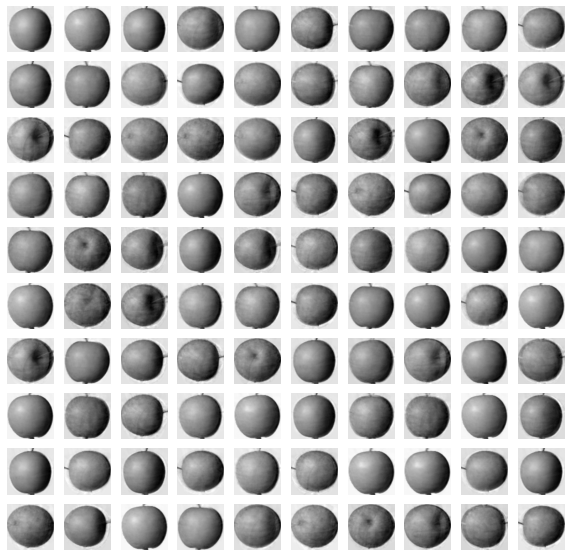

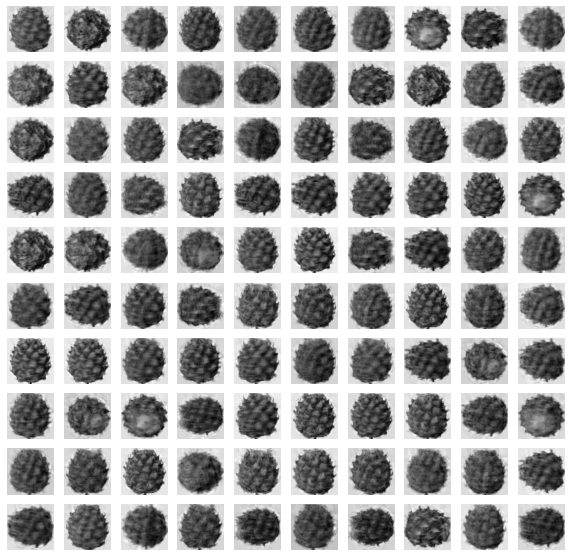

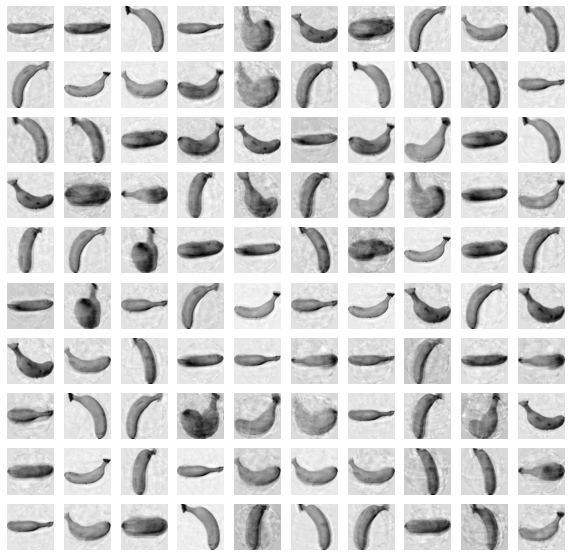

In [48]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

### 설명된 분산
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
- explained_variance_ratio_ : 각 주성분의 설명된 분산 비율이 기록되어 있음
- 분산 비율을 모두 합하며 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있음

In [50]:
print(np.sum(pca.explained_variance_ratio_))
# 92%가 넘는 분산을 유지하고 있음. 높은 분산률을 가지고 있어서 복원률도 높았던 것이다.

0.9214750413618827


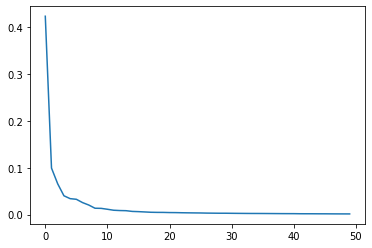

In [52]:
plt.plot(pca.explained_variance_ratio_)
plt.show()
# 처음 10개의 주성분이 대부분의 분산을 표현한다.

### 다른 알고리즘과 함께 사용하기
- 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해 보고 어떤 차이가 있는지 알아본다.
- 3개의 과일 사진 분류를 위해서 로지스틱 회귀 모델을 사용한다.

In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

target = [0]*100 + [1]*100 + [2]*100
# 0 : 사과, 1 : 파인애플, 2 : 바나나

In [55]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
                        

0.9966666666666667
1.3419791221618653


In [57]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
# pca로 훈련 데이터의 차원을 축소하면 저장 공간뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있다.

1.0
0.023275089263916016


In [58]:
# 설명된 분산의 50%에 달하는 주성분을 찾도록 pca 모델을 만들어본다.
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [59]:
print(pca.n_components_)

2


In [ ]:
# 원본 데이터 변환
fruits_pca = pca.transform(fruits_2d)